In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns',None)
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv(r"C:\Users\putta\Desktop\PYTHON\REGRESSION Predicting House Prices\House_Prices.csv")
df

,Home,Price,SqFt,Bedrooms,Bathrooms,Offers,Brick,Neighborhood
0,1,114300,1790,2,2,2,No,East
1,2,114200,2030,4,2,3,No,East
2,3,114800,1740,3,2,1,No,East
3,4,94700,1980,3,2,3,No,East
4,5,119800,2130,3,3,3,No,East
...,...,...,...,...,...,...,...,...
123,124,119700,1900,3,3,3,Yes,East
124,125,147900,2160,4,3,3,Yes,East
125,126,113500,2070,2,2,2,No,North
126,127,149900,2020,3,3,1,No,West


# Data Dictionary 

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128 entries, 0 to 127
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Home          128 non-null    int64 
 1   Price         128 non-null    int64 
 2   SqFt          128 non-null    int64 
 3   Bedrooms      128 non-null    int64 
 4   Bathrooms     128 non-null    int64 
 5   Offers        128 non-null    int64 
 6   Brick         128 non-null    object
 7   Neighborhood  128 non-null    object
dtypes: int64(6), object(2)
memory usage: 8.1+ KB


In [4]:
df.columns

Index(['Home', 'Price', 'SqFt', 'Bedrooms', 'Bathrooms', 'Offers', 'Brick',
       'Neighborhood'],
      dtype='object')

In [5]:
print('Nmuber of the Rows:    ',df.shape[0])
print('Nmuber of the Columns: ',df.shape[1])
print('Shape of the Data:     ',df.shape)
print('Size of the data:      ',df.size)
print('Unique variable is:    ','Home')


Nmuber of the Rows:     128
Nmuber of the Columns:  8
Shape of the Data:      (128, 8)
Size of the data:       1024
Unique variable is:     Home


In [6]:
df.columns= [val.replace('.','_') for val in df.columns]

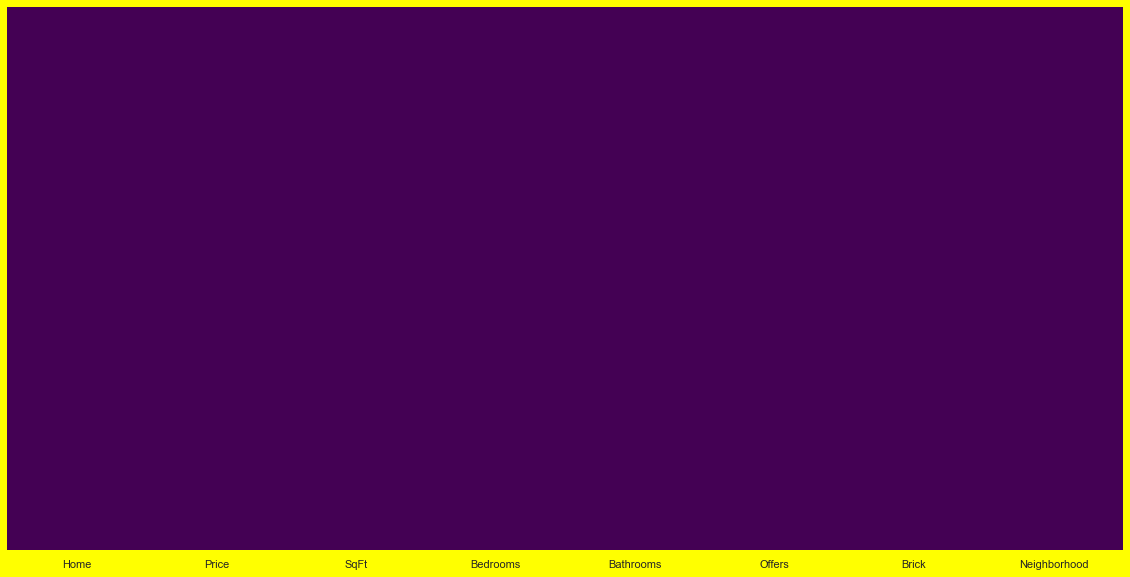

In [7]:
plt.figure(figsize=(20,10),facecolor='yellow')
sns.set(style='white')
sns.heatmap(df.isnull(),cbar=False,cmap='viridis',yticklabels=False)
plt.show()

In [8]:
df.isnull().sum()*100/df.isnull().sum().sum()

Home           NaN
Price          NaN
SqFt           NaN
Bedrooms       NaN
Bathrooms      NaN
Offers         NaN
Brick          NaN
Neighborhood   NaN
dtype: float64

In [9]:
# Get the number of null values and data type for each column
Unique_counts=df.nunique()
Null_counts = df.isnull().sum()
Not_null_counts=df.notnull().sum()
data_types = df.dtypes

# Combine the results into a single DataFrame
result = pd.concat([data_types,Unique_counts,Not_null_counts,Null_counts], axis=1, keys=['Data_Type','Unique_counts','Not_null','Num_Nulls'])

# Print the result
print(pd.DataFrame(result))

             Data_Type  Unique_counts  Not_null  Num_Nulls
Home             int64            128       128          0
Price            int64            123       128          0
SqFt             int64             61       128          0
Bedrooms         int64              4       128          0
Bathrooms        int64              3       128          0
Offers           int64              6       128          0
Brick           object              2       128          0
Neighborhood    object              3       128          0


In [10]:
df['Bedrooms']=df['Bedrooms'].astype('object')
df['Bathrooms']=df['Bathrooms'].astype('object')
df['Offers']=df['Offers'].astype('object')

In [11]:
Unique_counts=df.nunique()
Null_counts = df.isnull().sum()
Not_null_counts=df.notnull().sum()
data_types = df.dtypes

# Combine the results into a single DataFrame
result = pd.concat([data_types,Unique_counts,Not_null_counts,Null_counts], axis=1, keys=['Data_Type','Unique_counts','Not_null','Num_Nulls'])

# Print the result
print(pd.DataFrame(result))

             Data_Type  Unique_counts  Not_null  Num_Nulls
Home             int64            128       128          0
Price            int64            123       128          0
SqFt             int64             61       128          0
Bedrooms        object              4       128          0
Bathrooms       object              3       128          0
Offers          object              6       128          0
Brick           object              2       128          0
Neighborhood    object              3       128          0


In [12]:
for val in df.select_dtypes(include='object').columns:
    print('\n' + val )
    print('\n'+'number of Groups:', df[val].nunique())
    print('\n' + 'These are all different Groups:' ,'\n', df[val].value_counts())
    


Bedrooms

number of Groups: 4

These are all different Groups: 
 3    67
2    30
4    29
5     2
Name: Bedrooms, dtype: int64

Bathrooms

number of Groups: 3

These are all different Groups: 
 2    72
3    55
4     1
Name: Bathrooms, dtype: int64

Offers

number of Groups: 6

These are all different Groups: 
 3    46
2    36
1    23
4    19
5     3
6     1
Name: Offers, dtype: int64

Brick

number of Groups: 2

These are all different Groups: 
 No     86
Yes    42
Name: Brick, dtype: int64

Neighborhood

number of Groups: 3

These are all different Groups: 
 East     45
North    44
West     39
Name: Neighborhood, dtype: int64


In [13]:
# from the above we can say that state has nearly 46 states we can delete this varibles it has more than 20 subgroups
# inside so it will not show an impact to our model building

# Does data have Outliers? /Understand Distribution of data

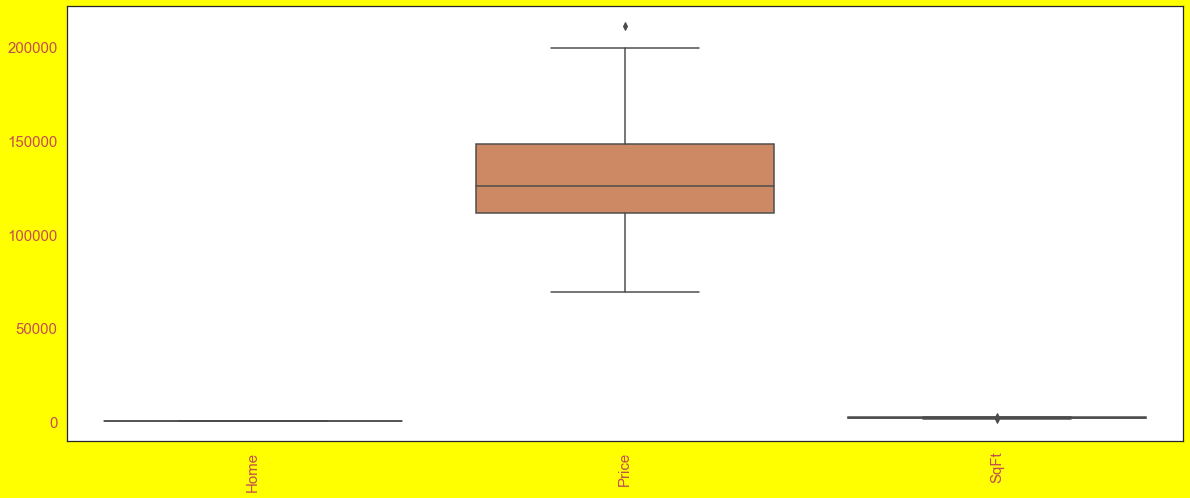

In [14]:
plt.figure(figsize=(20,8),facecolor='yellow')
sns.set(style='white')
sns.boxplot(data=df.select_dtypes(include=[int,float]))
plt.xticks(rotation=90,fontsize=15,color='r')
plt.yticks(rotation=0,fontsize=15,color='r')
plt.show()

# Does data have Duplicate records

In [15]:
df[df.duplicated()]
# there in no duplicates in the data

,Home,Price,SqFt,Bedrooms,Bathrooms,Offers,Brick,Neighborhood


In [16]:
df.select_dtypes(include=[object])

,Bedrooms,Bathrooms,Offers,Brick,Neighborhood
0,2,2,2,No,East
1,4,2,3,No,East
2,3,2,1,No,East
3,3,2,3,No,East
4,3,3,3,No,East
...,...,...,...,...,...
123,3,3,3,Yes,East
124,4,3,3,Yes,East
125,2,2,2,No,North
126,3,3,1,No,West


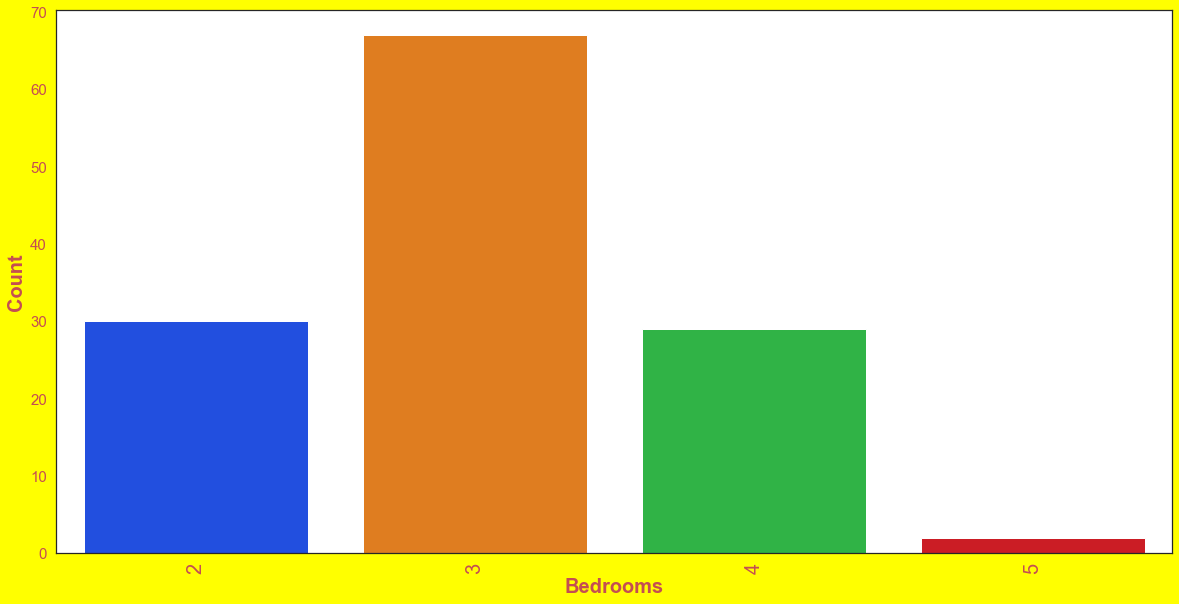

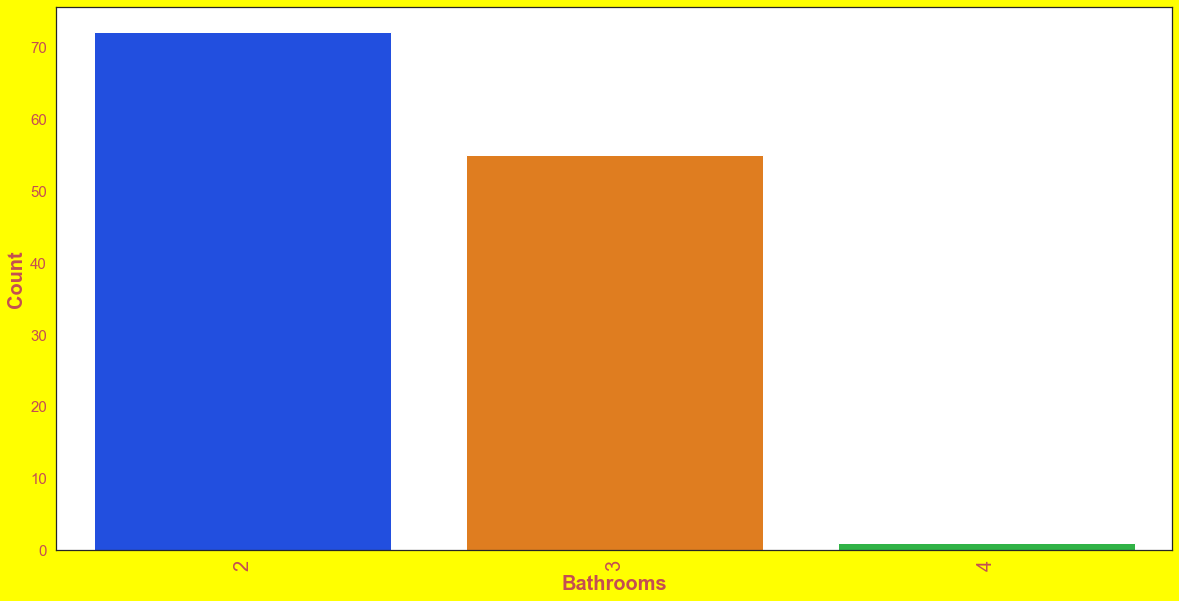

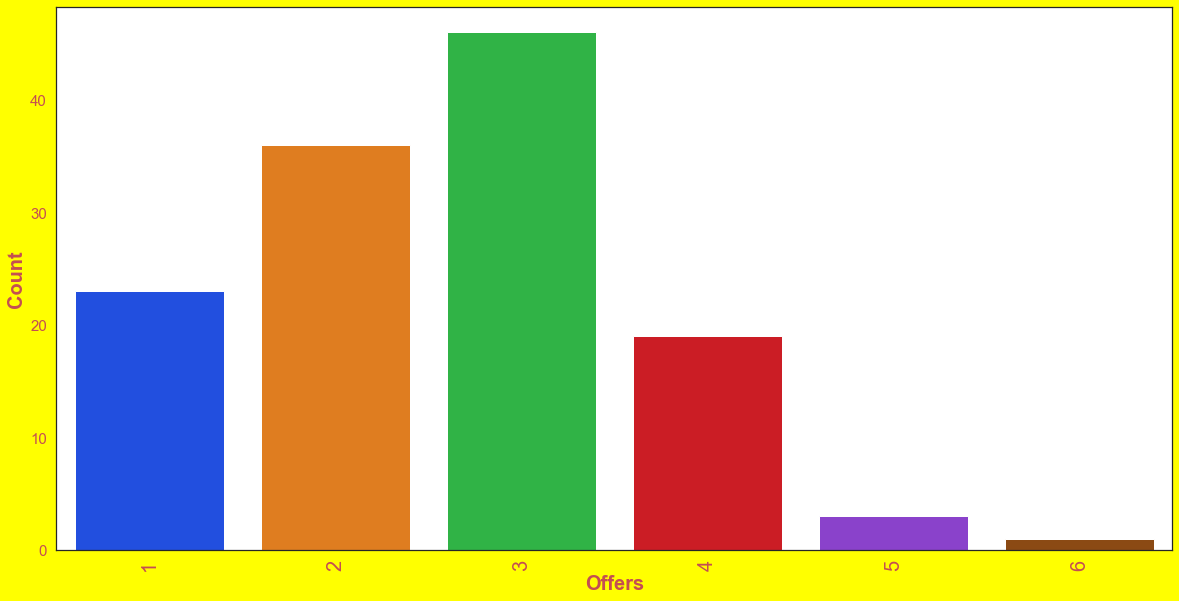

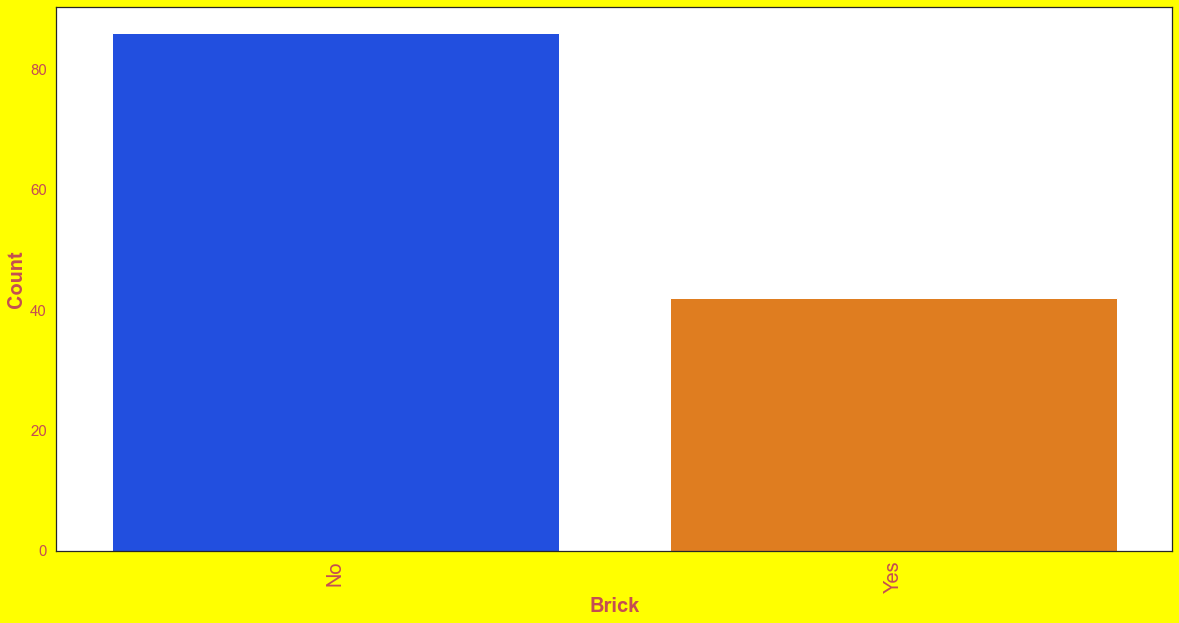

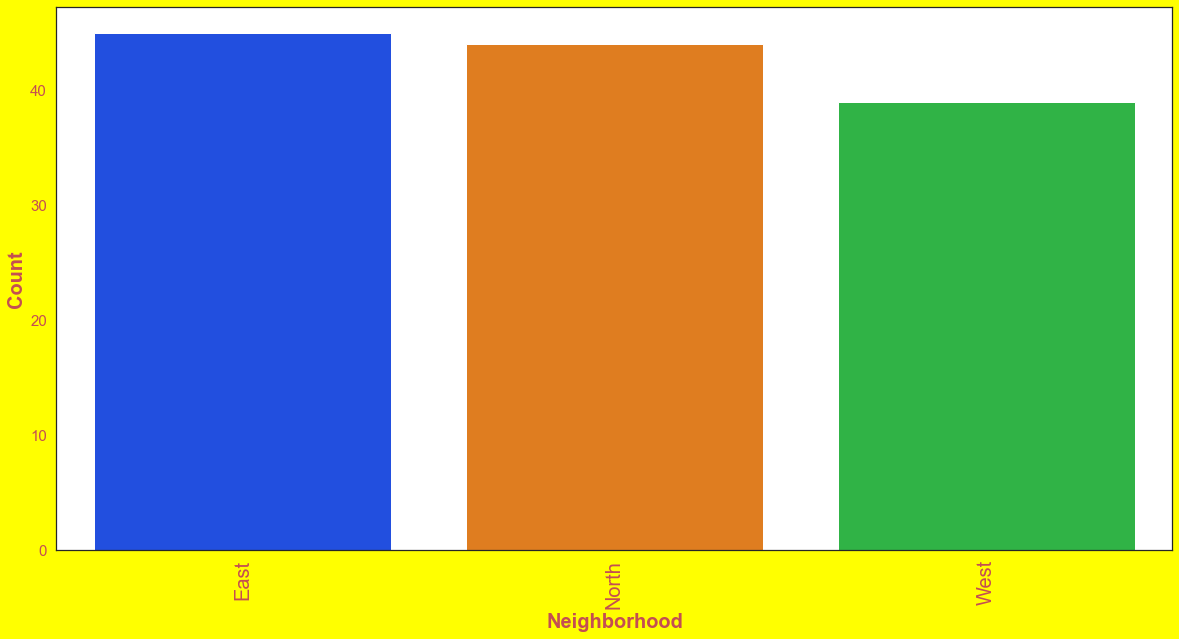

In [17]:
for val in df.select_dtypes(include=[object]):
    fequency_Table=df[val].value_counts()
    a=pd.DataFrame(fequency_Table).reset_index().rename({'index':val,val:'Count'},axis=1)
    plt.figure(figsize=(20,10),facecolor='yellow')
    sns.set(style='white')
    colors = sns.color_palette('bright')[0:5]
    sns.barplot(data=a,x=a.columns[0],y=a.columns[1],palette='bright',errwidth=0)
    plt.ylabel(a.columns[1],fontsize=20,color='r',fontweight='bold')
    plt.xlabel(a.columns[0],fontsize=20,color='r',fontweight='bold')
    plt.xticks(rotation=90,fontsize=20,color='r')
    plt.yticks(rotation=0,fontsize=15,color='r')
    plt.show()

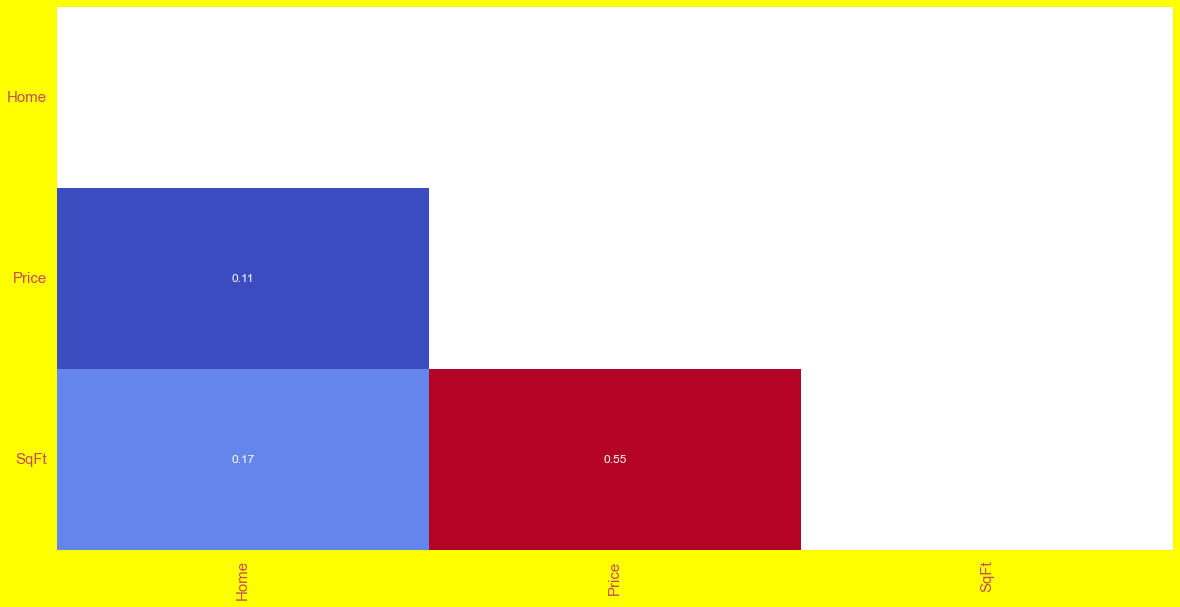

In [18]:
plt.figure(figsize=(20,10),facecolor='yellow')
sns.set(style='white')
mask = np.triu(np.ones_like(df.corr(), dtype=bool))
sns.heatmap(df.corr(), cmap="coolwarm", cbar=False, annot = True,mask=mask)
plt.xticks(rotation=90,fontsize=15,color='r')
plt.yticks(rotation=0,fontsize=15,color='r')
plt.show()

## 2. Model Building Steps - Modeling Stage

In [19]:
import pandas_profiling as pf

In [20]:
Report=pf.ProfileReport(df)

In [21]:
#Report.to_file('Report.html')

In [22]:
df.drop(columns=['Home'],inplace=True)
# Home is unique varible 

### Handlign missing values 

In [23]:
# Here there was no missing values

In [24]:
def outliers(x):
    if ((x.dtype=='int')| (x.dtype=='float')):
        Q1=x.quantile(0.25)
        Q3=x.quantile(0.75)
        IQR=Q3-Q1
        x=x.clip(lower=Q1-1.5*IQR,upper=Q3+1.5*IQR)                                      
    else :
        x
    return x
df=df.apply(outliers)

In [25]:
Unique_counts=df.nunique()
Null_counts = df.isnull().sum()
Not_null_counts=df.notnull().sum()
data_types = df.dtypes

# Combine the results into a single DataFrame
result = pd.concat([data_types,Unique_counts,Not_null_counts,Null_counts], axis=1, keys=['Data_Type','Unique_counts','Not_null','Num_Nulls'])

# Print the result
print(pd.DataFrame(result))

             Data_Type  Unique_counts  Not_null  Num_Nulls
Price            int64            123       128          0
SqFt             int64             61       128          0
Bedrooms        object              4       128          0
Bathrooms       object              3       128          0
Offers          object              6       128          0
Brick           object              2       128          0
Neighborhood    object              3       128          0


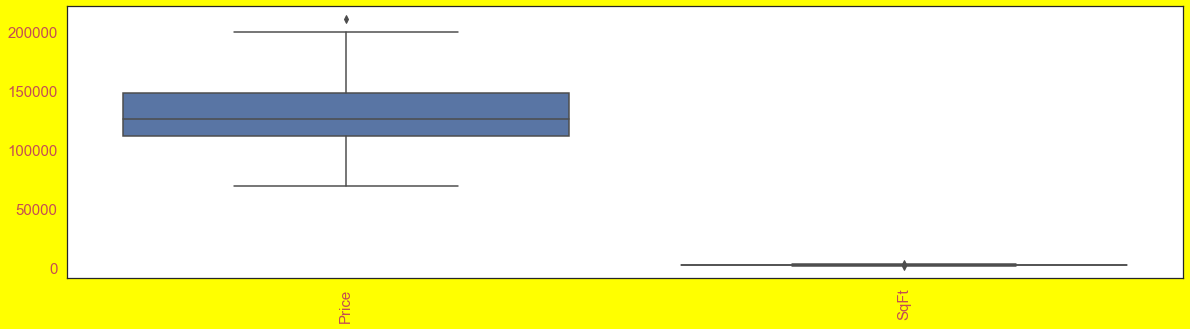

In [26]:
plt.figure(figsize=(20,5),facecolor='yellow')
sns.set(style='white')
sns.boxplot(data=df.select_dtypes(include=[int,float]))
plt.xticks(rotation=90,fontsize=15,color='r')
plt.yticks(rotation=0,fontsize=15,color='r')
plt.show()

### Converting categorical variables into numercal variables--- by Label encoding

In [27]:
for val in df.select_dtypes(include='object').columns:
    print('\n' + val )
    print('\n'+'number of Groups:', df[val].nunique())
    print('\n' + 'These are all different Groups:' ,'\n', df[val].value_counts())


Bedrooms

number of Groups: 4

These are all different Groups: 
 3    67
2    30
4    29
5     2
Name: Bedrooms, dtype: int64

Bathrooms

number of Groups: 3

These are all different Groups: 
 2    72
3    55
4     1
Name: Bathrooms, dtype: int64

Offers

number of Groups: 6

These are all different Groups: 
 3    46
2    36
1    23
4    19
5     3
6     1
Name: Offers, dtype: int64

Brick

number of Groups: 2

These are all different Groups: 
 No     86
Yes    42
Name: Brick, dtype: int64

Neighborhood

number of Groups: 3

These are all different Groups: 
 East     45
North    44
West     39
Name: Neighborhood, dtype: int64


In [28]:
df=pd.get_dummies(data=df,columns=['Bedrooms','Bathrooms','Offers','Brick','Neighborhood'],drop_first=True)

In [29]:
uint8_cols = df.select_dtypes(['uint8']).columns
# Convert uint8 columns to integer and replace in DataFrame
df[uint8_cols] = df[uint8_cols].astype(int)

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128 entries, 0 to 127
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   Price               128 non-null    int64
 1   SqFt                128 non-null    int64
 2   Bedrooms_3          128 non-null    int32
 3   Bedrooms_4          128 non-null    int32
 4   Bedrooms_5          128 non-null    int32
 5   Bathrooms_3         128 non-null    int32
 6   Bathrooms_4         128 non-null    int32
 7   Offers_2            128 non-null    int32
 8   Offers_3            128 non-null    int32
 9   Offers_4            128 non-null    int32
 10  Offers_5            128 non-null    int32
 11  Offers_6            128 non-null    int32
 12  Brick_Yes           128 non-null    int32
 13  Neighborhood_North  128 non-null    int32
 14  Neighborhood_West   128 non-null    int32
dtypes: int32(13), int64(2)
memory usage: 8.6 KB


## Data Preparation-2 (Assumptions of the techniques)

#### Linear Regression (Normality/Linearity/No outliers/No Multicollinieirty/Homoscedasticity)

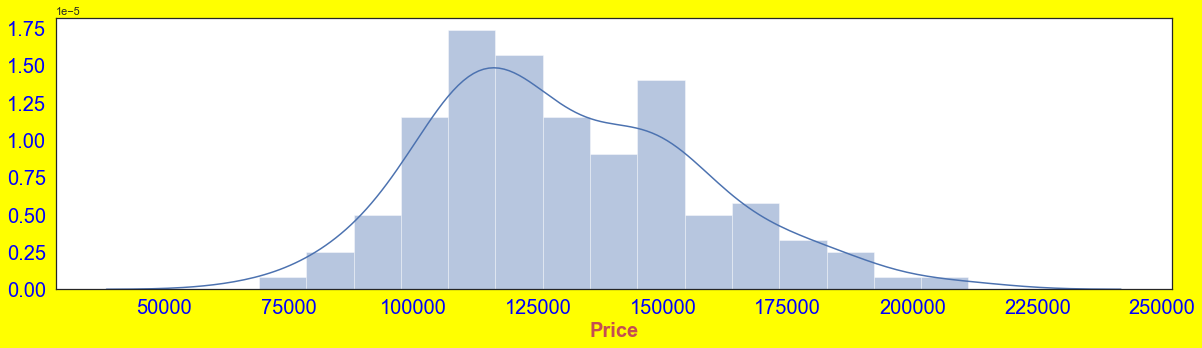

In [31]:
plt.figure(figsize=(20,5),facecolor='yellow')
sns.set(style='white') # distribution graph  and its a combination  pdf and histogram combination
sns.distplot(df.Price,bins=15)        
plt.ylabel('',fontsize=20,color='r',fontweight='bold')
plt.xlabel('Price',fontsize=20,color='r',fontweight='bold')# X-label
plt.xticks(rotation=0,fontsize=20,color='blue')
plt.yticks(rotation=0,fontsize=20,color='blue')
plt.show()# right skewness

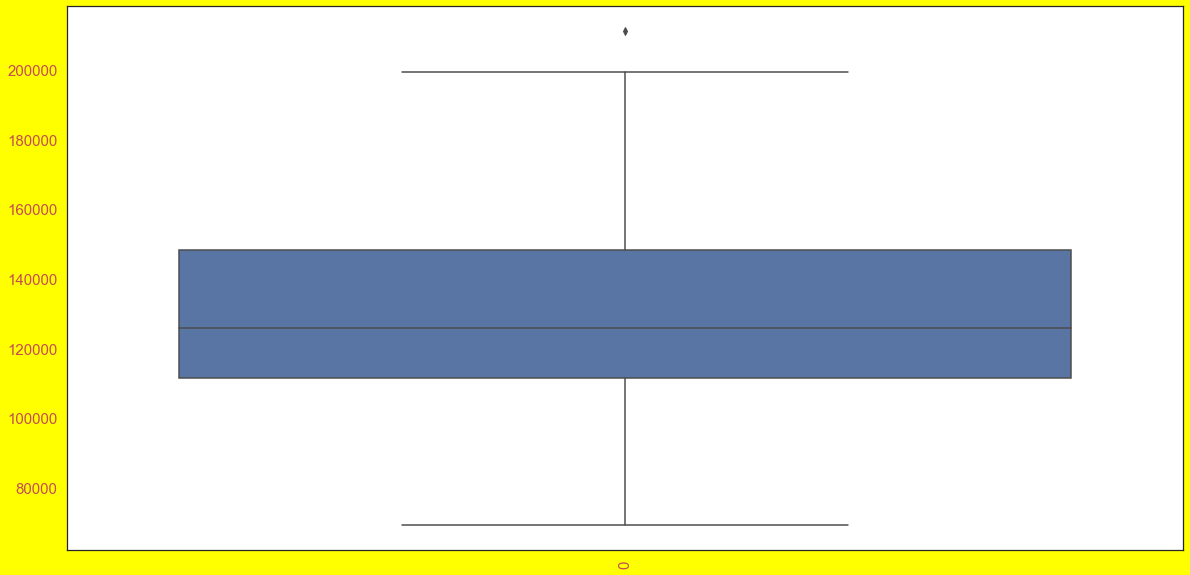

In [32]:
plt.figure(figsize=(20,10),facecolor='yellow')
sns.set(style='white')
sns.boxplot(data=df.Price)
plt.xticks(rotation=90,fontsize=15,color='r')
plt.yticks(rotation=0,fontsize=15,color='r')
plt.show()

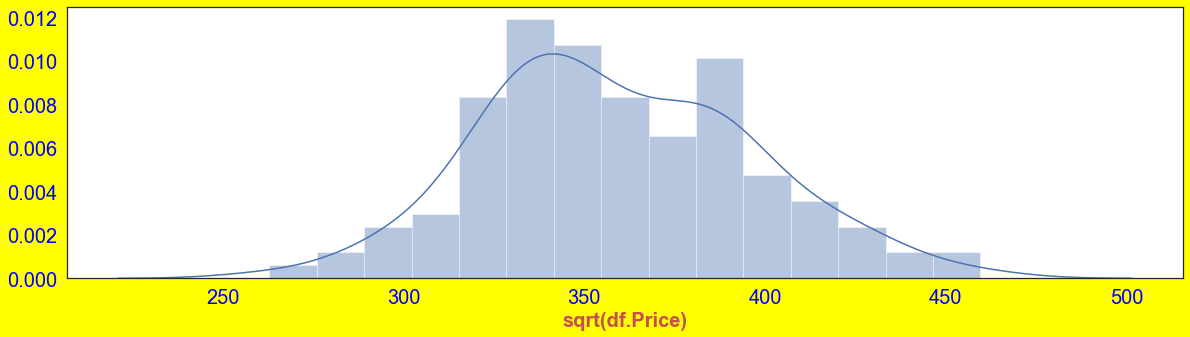

In [33]:
plt.figure(figsize=(20,5),facecolor='yellow')
sns.set(style='white') # distribution graph  and its a combination  pdf and histogram combination
sns.distplot(np.sqrt(df.Price),bins=15)      
plt.ylabel('',fontsize=20,color='r',fontweight='bold')
plt.xlabel('sqrt(df.Price)',fontsize=20,color='r',fontweight='bold')# X-label
plt.xticks(rotation=0,fontsize=20,color='blue')
plt.yticks(rotation=0,fontsize=20,color='blue')
plt.show()

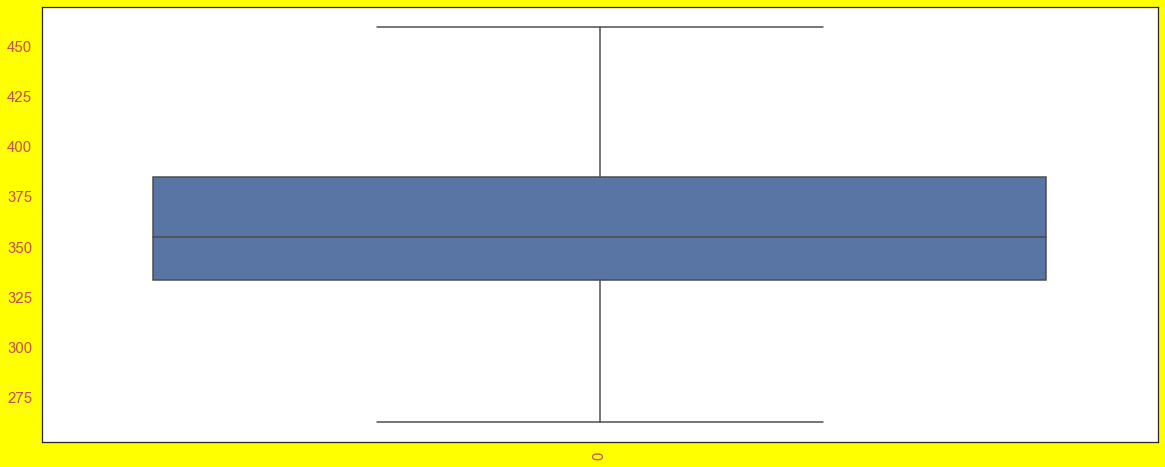

In [34]:
plt.figure(figsize=(20,8),facecolor='yellow')
sns.set(style='white')
sns.boxplot(data=np.sqrt(df.Price))
plt.xticks(rotation=90,fontsize=15,color='r')
plt.yticks(rotation=0,fontsize=15,color='r')
plt.show()

In [35]:
df['sqrt_Price'] = np.sqrt(df.Price)
df.drop('Price',axis=1,inplace=True)

### Checking Linearity

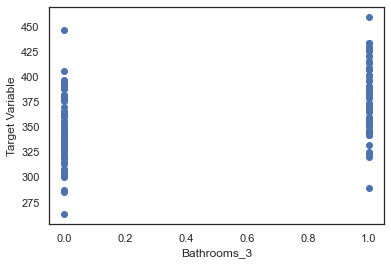

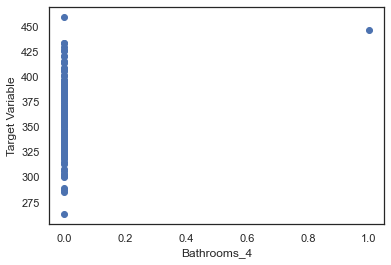

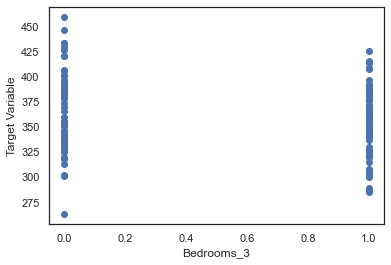

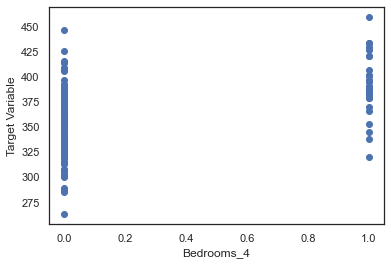

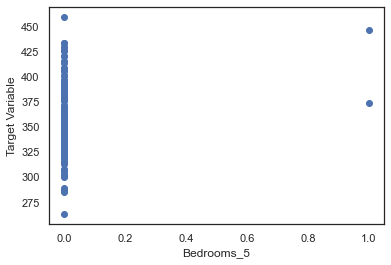

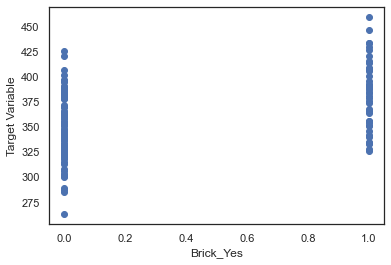

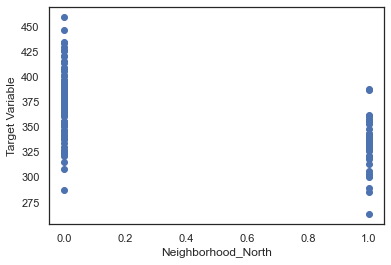

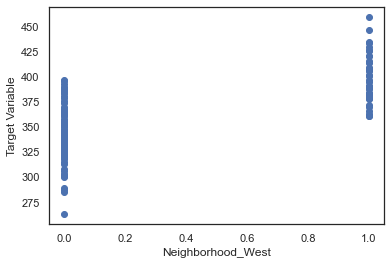

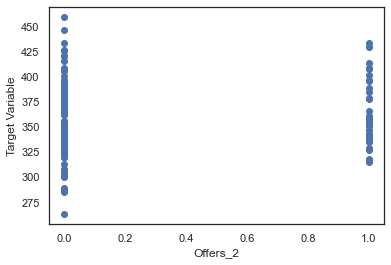

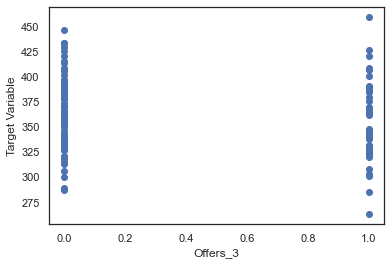

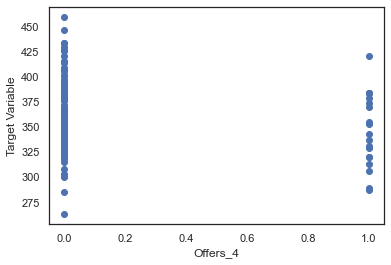

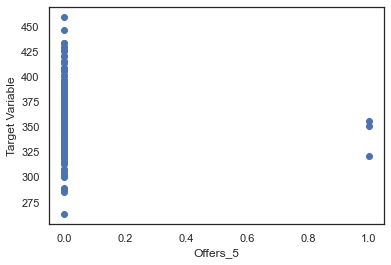

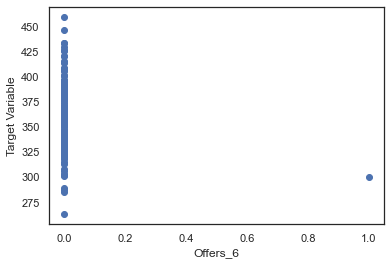

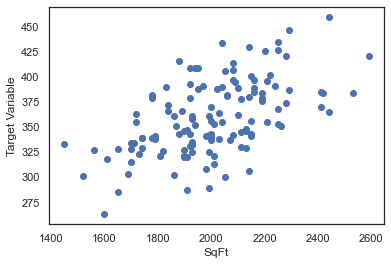

In [36]:
target = df['sqrt_Price']
independent_vars = df[df.columns.difference(['sqrt_Price'])]
# Create scatter plots of each independent variable against the target variable
for column in independent_vars.columns:
    plt.scatter(independent_vars[column], target)
    plt.xlabel(column)
    plt.ylabel('Target Variable')
    plt.show()

# Data Preparation-3 (Feature selection/Feature engineering/Feature identification)

In [37]:
corre_y=df.corrwith(df.sqrt_Price)
corre_y.to_csv('corre_y.csv')

In [38]:
corre_y_df=abs(corre_y).reset_index()
corre_y_df.columns = ['Variable', 'Correlation']

In [39]:
corre_y_df=corre_y_df.sort_values(by='Correlation',ascending=False)
corre_y_df

,Variable,Correlation
14,sqrt_Price,1.000000
13,Neighborhood_West,0.704054
0,SqFt,0.556043
12,Neighborhood_North,0.555808
2,Bedrooms_4,0.475906
4,Bathrooms_3,0.460241
11,Brick_Yes,0.448512
5,Bathrooms_4,0.210836
1,Bedrooms_3,0.176884
3,Bedrooms_5,0.174272


In [40]:
corr_variables=corre_y_df['Variable'][corre_y_df.Correlation>=0.1].unique()
corr_variables

array(['sqrt_Price', 'Neighborhood_West', 'SqFt', 'Neighborhood_North',
       'Bedrooms_4', 'Bathrooms_3', 'Brick_Yes', 'Bathrooms_4',
       'Bedrooms_3', 'Bedrooms_5', 'Offers_4', 'Offers_6', 'Offers_3'],
      dtype=object)

In [41]:
df[corr_variables].apply(lambda x:np.std(x)/np.mean(x))

sqrt_Price             0.102369
Neighborhood_West      1.510646
SqFt                   0.105323
Neighborhood_North     1.381699
Bedrooms_4             1.847645
Bathrooms_3            1.152073
Brick_Yes              1.430950
Bathrooms_4           11.269428
Bedrooms_3             0.954174
Bedrooms_5             7.937254
Offers_4               2.395171
Offers_6              11.269428
Offers_3               1.335144
dtype: float64

## Multicolinieity by VIF

In [42]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [43]:
y = df['sqrt_Price']
X = df[df[corr_variables].columns.difference(['sqrt_Price','Bedrooms_3','Neighborhood_West'])]

In [44]:
# Calculate the VIF for each independent variable
vif = pd.DataFrame()
vif["variables"] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# Print the VIF for each independent variable
print(vif)

            variables       VIF
0         Bathrooms_3  2.218098
1         Bathrooms_4  2.106610
2          Bedrooms_4  1.572509
3          Bedrooms_5  2.201901
4           Brick_Yes  1.708180
5  Neighborhood_North  1.992541
6            Offers_3  1.854404
7            Offers_4  1.609416
8            Offers_6  1.043634
9                SqFt  4.908244


In [45]:
vif['variables'].unique()

array(['Bathrooms_3', 'Bathrooms_4', 'Bedrooms_4', 'Bedrooms_5',
       'Brick_Yes', 'Neighborhood_North', 'Offers_3', 'Offers_4',
       'Offers_6', 'SqFt'], dtype=object)

In [46]:
df_final=df[['Bathrooms_3', 'Bathrooms_4', 'Bedrooms_4', 'Bedrooms_5',
       'Brick_Yes', 'Neighborhood_North', 'Offers_3', 'Offers_4',
       'Offers_6', 'SqFt','sqrt_Price']]

In [47]:
df_final

,Bathrooms_3,Bathrooms_4,Bedrooms_4,Bedrooms_5,Brick_Yes,Neighborhood_North,Offers_3,Offers_4,Offers_6,SqFt,sqrt_Price
0,0,0,0,0,0,0,0,0,0,1790,338.082830
1,0,0,1,0,0,0,1,0,0,2030,337.934905
2,0,0,0,0,0,0,0,0,0,1740,338.821487
3,0,0,0,0,0,0,1,0,0,1980,307.733651
4,1,0,0,0,0,0,1,0,0,2130,346.121366
...,...,...,...,...,...,...,...,...,...,...,...
123,1,0,0,0,1,0,1,0,0,1900,345.976878
124,1,0,1,0,1,0,1,0,0,2160,384.577690
125,0,0,0,0,0,1,0,0,0,2070,336.897611
126,1,0,0,0,0,0,0,0,0,2020,387.169214


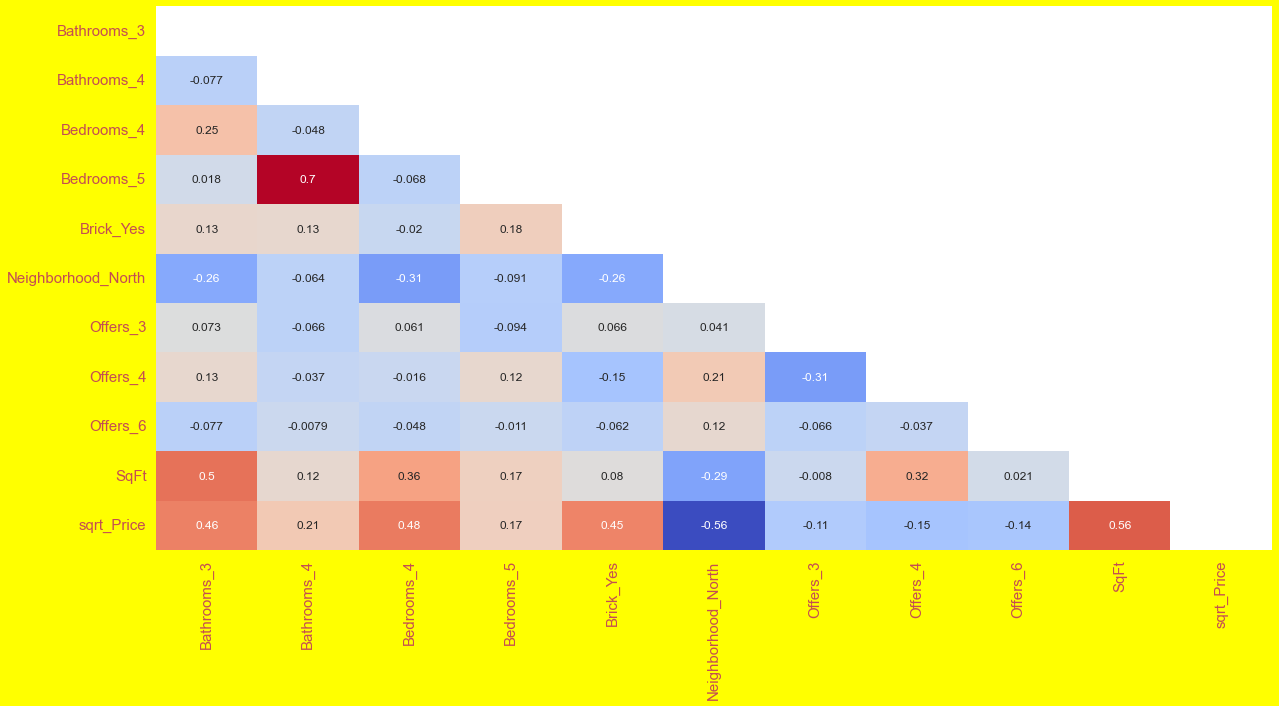

In [48]:
plt.figure(figsize=(20,10),facecolor='yellow')
sns.set(style='white')
mask = np.triu(np.ones_like(df_final.corr(), dtype=bool))
sns.heatmap(df_final.corr(), cmap="coolwarm", cbar=False, annot = True,mask=mask)
plt.xticks(rotation=90,fontsize=15,color='r')
plt.yticks(rotation=0,fontsize=15,color='r')
plt.show()

# Data Preparation-4

In [49]:
from sklearn.model_selection import train_test_split

In [50]:
y=target = df_final[['sqrt_Price']]
X=features =df_final[df_final.columns.difference(['sqrt_Price'])]

In [51]:
train_X, test_X, train_y, test_y= train_test_split(X, y, train_size = 0.6, test_size = 0.4,random_state = 70)

In [52]:
import statsmodels.api as sm

In [53]:
train_X_wc=sm.add_constant(train_X)
train_X_wc.head(5)

,const,Bathrooms_3,Bathrooms_4,Bedrooms_4,Bedrooms_5,Brick_Yes,Neighborhood_North,Offers_3,Offers_4,Offers_6,SqFt
22,1.0,0,0,0,0,0,1,1,0,0,1690
122,1.0,0,0,0,0,1,0,0,0,0,2060
53,1.0,0,0,0,0,0,1,1,0,0,2100
107,1.0,0,0,0,0,1,0,0,0,0,1890
101,1.0,1,0,0,0,0,0,0,0,0,2260


In [54]:
test_X_wc=sm.add_constant(test_X)
test_X_wc.head(5)

,const,Bathrooms_3,Bathrooms_4,Bedrooms_4,Bedrooms_5,Brick_Yes,Neighborhood_North,Offers_3,Offers_4,Offers_6,SqFt
55,1.0,0,0,0,0,1,0,0,0,0,1720
38,1.0,0,0,0,0,0,0,0,0,0,1720
126,1.0,1,0,0,0,0,0,0,0,0,2020
102,1.0,1,0,0,0,0,0,0,1,0,2410
32,1.0,1,0,0,0,1,0,1,0,0,2250


In [55]:
ols_model= sm.OLS(train_y, train_X_wc).fit()

#### Performing a summary operation lists out all the different parameters of the regression line fitted

In [56]:
print(ols_model.summary())

                            OLS Regression Results                            
Dep. Variable:             sqrt_Price   R-squared:                       0.746
Model:                            OLS   Adj. R-squared:                  0.712
Method:                 Least Squares   F-statistic:                     21.59
Date:                Wed, 22 Feb 2023   Prob (F-statistic):           1.80e-16
Time:                        14:13:56   Log-Likelihood:                -327.64
No. Observations:                  76   AIC:                             675.3
Df Residuals:                      66   BIC:                             698.6
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                243.5912     27

In [57]:
ols_model.params

const                 243.591230
Bathrooms_3            12.797403
Bathrooms_4            25.815923
Bedrooms_4             16.503158
Bedrooms_5             25.815923
Brick_Yes              20.058926
Neighborhood_North    -16.968760
Offers_3              -12.031412
Offers_4              -23.543411
Offers_6              -43.726844
SqFt                    0.057368
dtype: float64

In [58]:
y_train_pred = (ols_model.predict(train_X_wc))
y_test_pred = (ols_model.predict(test_X_wc))
y_train_act = (train_y.sqrt_Price)
y_test_act = (test_y.sqrt_Price) 

In [59]:
Error=y_train_act - y_train_pred

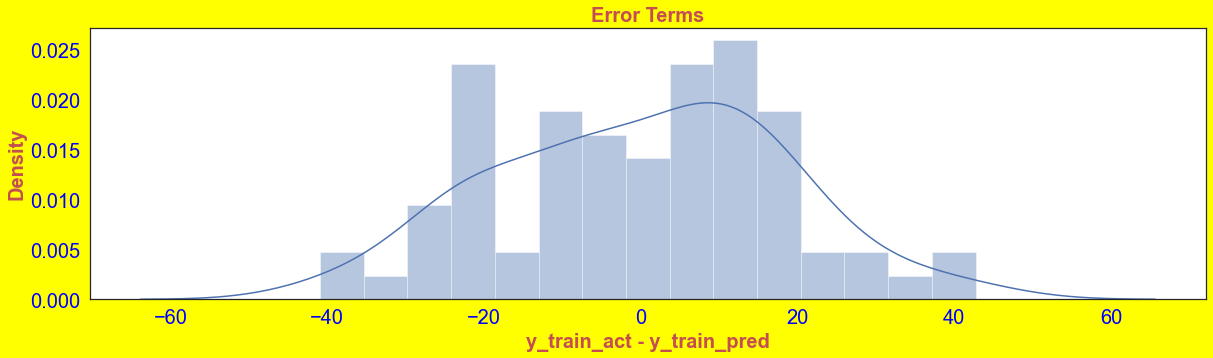

In [60]:
plt.figure(figsize=(20,5),facecolor='yellow')
sns.set(style='white') # distribution graph  and its a combination  pdf and histogram combination
sns.distplot(Error, bins = 15)
plt.title('Error Terms',fontsize=20,color='r',fontweight='bold')  # Plot heading           
plt.ylabel('Density',fontsize=20,color='r',fontweight='bold')
plt.xlabel('y_train_act - y_train_pred',fontsize=20,color='r',fontweight='bold')# X-label
plt.xticks(rotation=0,fontsize=20,color='blue')
plt.yticks(rotation=0,fontsize=20,color='blue')
plt.show()

In [61]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_percentage_error

### Looking at the RMSE

In [62]:
print('Train_RMSE' ,np.sqrt(mean_squared_error(y_train_act, y_train_pred)))
print('Test_RMSE' ,np.sqrt(mean_squared_error(y_test_act, y_test_pred)))

Train_RMSE 18.031912110434725
Test_RMSE 20.72097546834368


### Checking the R-squared

In [63]:
Train_r_squared=r2_score(y_train_act, y_train_pred)
Test_r_squared=r2_score(y_test_act, y_test_pred)
print('Train_R2',Train_r_squared)
print('Test R2',Test_r_squared)

Train_R2 0.7464185159665442
Test R2 0.7050101879213426


### Checking the Correlation

In [64]:
print('Train_corr:', np.corrcoef(y_train_act, y_train_pred)[1][0])
print('Test_corr:', np.corrcoef(y_test_act, y_test_pred)[1][0])

Train_corr: 0.8639551585392287
Test_corr: 0.8612591769141639


### Checking The MAPE

In [65]:
Train_Mean_absolute_percentage_error=r2_score(y_train_act, y_train_pred)
Test_Mean_absolute_percentage_error=r2_score(y_test_act, y_test_pred)
print('Train_MAPE',Train_Mean_absolute_percentage_error)
print('Test_MAPE',Test_Mean_absolute_percentage_error)

Train_MAPE 0.7464185159665442
Test_MAPE 0.7050101879213426


In [66]:
df_final.head(5)

,Bathrooms_3,Bathrooms_4,Bedrooms_4,Bedrooms_5,Brick_Yes,Neighborhood_North,Offers_3,Offers_4,Offers_6,SqFt,sqrt_Price
0,0,0,0,0,0,0,0,0,0,1790,338.082830
1,0,0,1,0,0,0,1,0,0,2030,337.934905
2,0,0,0,0,0,0,0,0,0,1740,338.821487
3,0,0,0,0,0,0,1,0,0,1980,307.733651
4,1,0,0,0,0,0,1,0,0,2130,346.121366
